In [179]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms 
import torch.nn.functional as F
from torchvision.utils import make_grid

In [180]:
means = (0.5,0.5,0.5)
std = (0.5,0.5,0.5)

train_transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize(means, std)])

test_transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize(means, std)])



In [181]:
num_epochs = 50
batch_size = 25
learning_rate = 0.01

In [182]:
train_dataset = torchvision.datasets.CIFAR10(root='cifar-10-batches-py', train=True,
                                        download=True, transform=train_transform)

test_dataset = torchvision.datasets.CIFAR10(root='cifar-10-batches-py', train=False,
                                       download=True, transform=test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
                                          

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [183]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


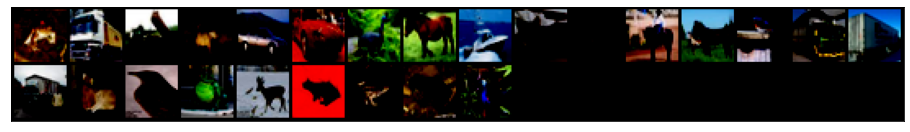

In [184]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_loader)

In [186]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.Linear

In [187]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
        
        # using a 2x2 grid as a filter 
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size = 5)
        
        nn.Flatten()
        self.fc1 = nn.Linear(400, 120)

        self.fc2 = nn.Linear(120, 84)

        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = x.view(-1, 16 * 5 * 5)            
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return x

In [188]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
